In [8]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import streamlit as st
import os
import time
import pickle
import yfinance as yf

## Task 01

In [3]:
# Upload dataset file from local storage
print("Upload your house pricing dataset")
uploaded = files.upload()
df_house = pd.read_csv(next(iter(uploaded)))

Upload your house pricing dataset


Saving house_data.csv to house_data.csv


## Data Preprocessing

In [4]:
print("Preprocessing house pricing dataset...")
df_house.dropna(inplace=True)
non_numeric_columns = df_house.select_dtypes(include=['object']).columns.tolist()
if non_numeric_columns:
    df_house = pd.get_dummies(df_house, columns=non_numeric_columns, drop_first=True)
if 'price' not in df_house.columns:
    raise KeyError("The dataset does not contain a 'price' column. Please check the file.")

# Define Features and Target
X_house = df_house.drop(columns=['price'])
y_house = df_house['price']

# Ensure all features are numeric
if not np.issubdtype(X_house.dtypes.values[0], np.number):
    raise ValueError("Some features are still non-numeric. Check the dataset preprocessing.")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.2, random_state=42)

Preprocessing house pricing dataset...


## Train model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Predictions

In [6]:
y_pred = model.predict(X_test)

## Evaluation

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'House Price Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}, Adjusted R-squared: {adj_r2:.2f}')

House Price Model Evaluation:
MSE: 149210817251.74, R-squared: 0.49, Adjusted R-squared: 0.09


## Task 02

In [10]:
print("Upload your salary dataset")
uploaded = files.upload()
df_salary = pd.read_csv(next(iter(uploaded)))

Upload your salary dataset


Saving salary_data.csv to salary_data.csv


In [11]:
# Data Preprocessing
df_salary.dropna(inplace=True)
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in df_salary.columns]
if existing_categorical_columns:
    df_salary = pd.get_dummies(df_salary, columns=existing_categorical_columns, drop_first=True)
if 'Salary' not in df_salary.columns:
    raise KeyError("The dataset does not contain a 'Salary' column. Please check the file.")

# Define Features and Target
X_salary = df_salary.drop(columns=['Salary'])
y_salary = df_salary['Salary']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

In [12]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

## Evaluation

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Salary Model Evaluation:\nMSE: {mse}, R-squared: {r2}')

Salary Model Evaluation:
MSE: 49830096.85590839, R-squared: 0.9024461774180497


## Visualization

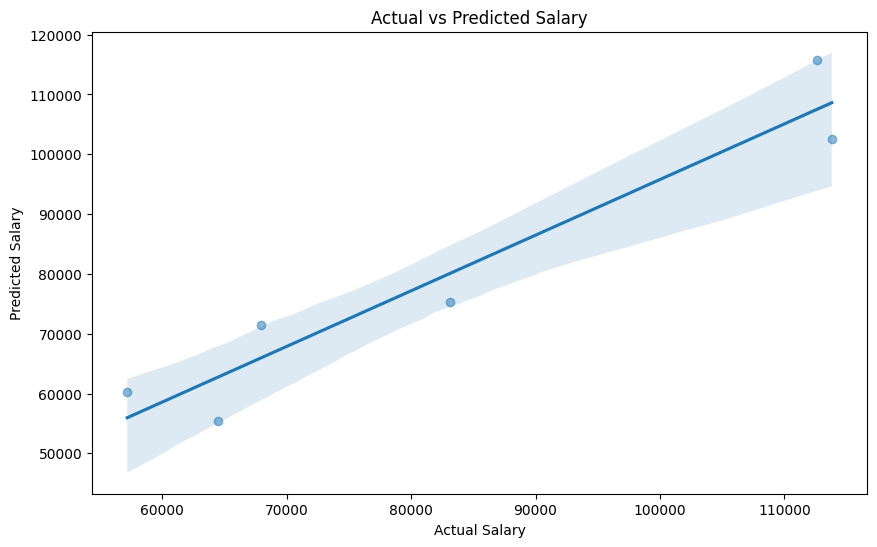

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In [15]:
# Streamlit Web App for Salary Prediction
def salary_prediction_app():
    st.title("Salary Prediction System")
    experience = st.number_input("Years of Experience", min_value=0.0, max_value=50.0, step=0.1)
    job_role = st.selectbox("Job Role", df_salary['job_role'].unique()) if 'job_role' in df_salary else ''
    location = st.selectbox("Location", df_salary['location'].unique()) if 'location' in df_salary else ''
    degree = st.selectbox("Degree", df_salary['degree'].unique()) if 'degree' in df_salary else ''

    # Prepare input
    input_data = pd.DataFrame([[experience]], columns=['experience'])
    if 'job_role' in df_salary:
        for role in df_salary['job_role'].unique():
            input_data[f'job_role_{role}'] = int(role == job_role)
    if 'location' in df_salary:
        for loc in df_salary['location'].unique():
            input_data[f'location_{loc}'] = int(loc == location)
    if 'degree' in df_salary:
        for deg in df_salary['degree'].unique():
            input_data[f'degree_{deg}'] = int(deg == degree)

    prediction = model.predict(input_data)[0]
    st.write(f"Predicted Salary: ${prediction:.2f}")

In [16]:
# Save Streamlit app as a Python script
app_code = """
import streamlit as st
import pandas as pd
import pickle

# Load model
with open('salary_model.pkl', 'rb') as f:
    model = pickle.load(f)

def salary_prediction_app():
    st.title("Salary Prediction System")
    experience = st.number_input("Years of Experience", min_value=0.0, max_value=50.0, step=0.1)
    prediction = model.predict([[experience]])[0]
    st.write(f"Predicted Salary: ${prediction:.2f}")

salary_prediction_app()
"""

with open("app.py", "w") as f:
    f.write(app_code)

## Save the trained model

In [17]:
import pickle
with open('salary_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Run Streamlit in Colab

In [19]:
!wget -q -O - ipv4.icanhazip.com

34.106.189.234


In [22]:
print("Starting Streamlit...")
!npx localtunnel --port 8501 &
time.sleep(5)
!streamlit run app.py &

Starting Streamlit...
⠙⠹⠸⠼⠴your url is: https://rude-bars-post.loca.lt



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.189.234:8501

  Stopping...


## Task 03

In [24]:
# Fetch stock data
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')
    df = df[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    return df

# Load dataset
ticker = 'AAPL'  # Example stock symbol
df_stock = get_stock_data(ticker)

# Define features and target variable
X_stock = df_stock[['Day', 'Volume']]
y_stock = df_stock['Close']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_stock, y_stock, test_size=0.2, random_state=42)

In [25]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predictions
y_pred = model.predict(X_test)

Stock Price Model Evaluation:
MSE: 259.87258536610875, R-squared: 0.845633577802406


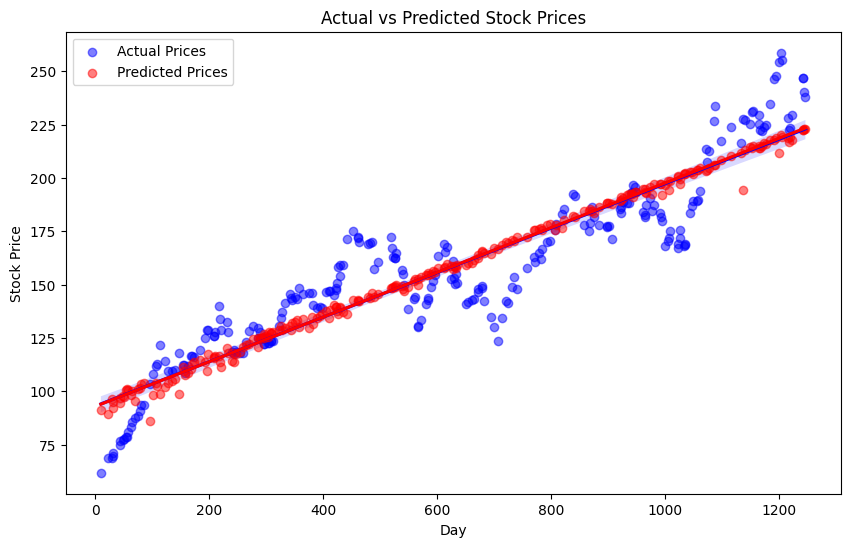

In [27]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Stock Price Model Evaluation:\nMSE: {mse}, R-squared: {r2}')

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['Day'], y=y_test, scatter_kws={'alpha':0.5}, label='Actual Prices', color='blue')
sns.regplot(x=X_test['Day'], y=y_pred, scatter_kws={'alpha':0.5}, label='Predicted Prices', color='red')
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.show()

In [28]:
# Streamlit Web App for Stock Prediction
def stock_prediction_app():
    st.title("Stock Price Prediction System")
    st.write(f"Stock: {ticker}")
    fig, ax = plt.subplots()
    ax.plot(df_stock['Day'], df_stock['Close'], label='Actual Prices', color='blue')
    ax.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red')
    ax.set_xlabel('Day')
    ax.set_ylabel('Stock Price')
    ax.legend()
    st.pyplot(fig)

    # Prediction function
    def predict_stock_price(day, volume):
        input_data = np.array([day, volume]).reshape(1, -1)
        return model.predict(input_data)[0]

    # User input for prediction
    st.sidebar.header('Predict Future Stock Price')
    day = st.sidebar.number_input('Enter Future Day:', min_value=int(df_stock['Day'].min()), max_value=int(df_stock['Day'].max())+30)
    volume = st.sidebar.number_input('Enter Expected Volume:', min_value=int(df_stock['Volume'].min()), max_value=int(df_stock['Volume'].max()))
    if st.sidebar.button('Predict'):
        prediction = predict_stock_price(day, volume)
        st.sidebar.write(f'Predicted Stock Price: ${prediction:.2f}')

# Save Streamlit app as a Python script
app_code = """
import streamlit as st
import pandas as pd
import pickle

def stock_prediction_app():
    st.title("Stock Price Prediction System")
    st.write("Stock: AAPL")
    day = st.number_input("Enter Future Day:", min_value=0, max_value=2000)
    volume = st.number_input("Enter Expected Volume:", min_value=0)

    with open('stock_model.pkl', 'rb') as f:
        model = pickle.load(f)

    prediction = model.predict([[day, volume]])[0]
    st.write(f"Predicted Stock Price: ${prediction:.2f}")

stock_prediction_app()
"""

with open("app.py", "w") as f:
    f.write(app_code)

# Save the trained model
import pickle
with open('stock_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Run Streamlit in Colab
print("Starting Streamlit...")
!pip install streamlit
!npx localtunnel --port 8501 &
time.sleep(5)
!streamlit run app.py &

## Task 04

Saving customer_churn_data.csv to customer_churn_data (1).csv
Accuracy: 0.75
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



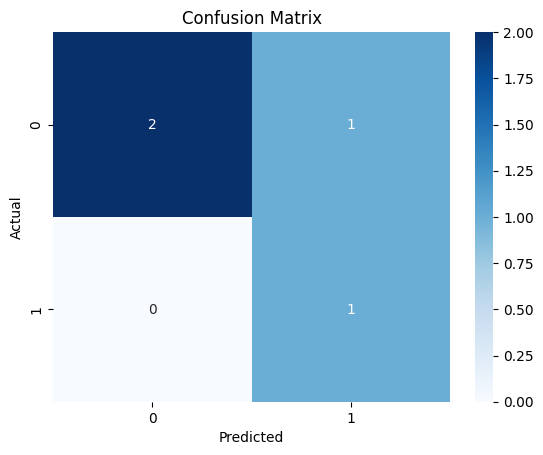

In [32]:
def load_churn_data():
    uploaded = files.upload()
    df = pd.read_csv(next(iter(uploaded)))
    return df

df = load_churn_data()
# Preprocess data
df.dropna(inplace=True)
df['churn'] = df['churn'].astype(str).str.strip().map({'False': 0, 'True': 1})
df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables

# Define features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Task 05

In [33]:
# Load dataset
df = pd.read_csv("owid-energy-data.csv")

# Identify the correct column for energy consumption
energy_columns = [col for col in df.columns if "consumption" in col.lower()]
if not energy_columns:
    raise KeyError("No column related to energy consumption found in the dataset.")

# Use the first identified energy consumption column
energy_column = energy_columns[0]

# Preprocess data
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop(columns=[energy_column])
y = df[energy_column]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}, R-squared: {r2:.2f}')# Load dataset
df = pd.read_csv("owid-energy-data.csv")

# Identify the correct column for energy consumption
energy_columns = [col for col in df.columns if "consumption" in col.lower()]
if not energy_columns:
    raise KeyError("No column related to energy consumption found in the dataset.")

# Use the first identified energy consumption column
energy_column = energy_columns[0]

# Preprocess data
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop(columns=[energy_column])
y = df[energy_column]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}, R-squared: {r2:.2f}')

MSE: 1.84, R-squared: 0.98
MSE: 1.84, R-squared: 0.98
